In [1]:
import numpy as np
import qutip
from dimer import DimerParameters, get_H_S, get_c_ops
import matplotlib.pyplot as plt

In [2]:
# Number of simulations with the same parameters.
nsim = 4

# Statistics
ntraj = int(2.5 * 10**5)

# Physical parameters.
# lambdas = [[.25, 1.75]]
lambdas = [[.25, .25],
           [.25, 1.75],
           [1.25, .25]]

T = 20
dt = .01
omega_S = 1

t_eval = np.array([0, T])

# solver = "trsolve"
solver = "mcsolve"
# solver = "gutzwiller"

store_states = False
compute_eentropy = False
compute_fidelity = False

no_click = False

psi0 = qutip.tensor(qutip.basis(2, 1), qutip.basis(2, 1))

In [ ]:
bins = 72
binning_range = [[-np.pi, np.pi], [-np.pi, np.pi]]
hist_full = []

for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    tl = []
    tr = []

    if i == 1:
        nsim = 40
    else:
        nsim = 4

    for simid in range(nsim):
        sim = DimerParameters(omega_S,
                              lmbd_1,
                              lmbd_2,
                              get_H_S(omega_S),
                              get_c_ops(lmbd_1, lmbd_2, omega_S),
                              psi0,
                              t_eval,
                              ntraj,
                              solver,
                              dt,
                              no_click,
                              simid)
        # f = open(f"data/{str(sim)}.pkl", "rb")
        # data = load(f)
        # f.close()
        # walk_pos.append(data[1])
        f = open(f"data/{str(sim)}.npz", "rb")
        data = np.load(f)
        tl.append(data['bloch_coords'][:-1,0,1])
        tr.append(data['bloch_coords'][:-1,1,1])
        # walk_pos.append(data['walk_pos'])

    tl = np.array(tl)
    tr = np.array(tr)
    tl = np.concatenate(tl, axis=0)
    tr = np.concatenate(tr, axis=0)


    h, edges_l, edges_r = np.histogram2d(tl,
                                         tr,
                                         bins=bins,
                                         range=binning_range,
                                         density=True)
    
    hist_full.append(h)

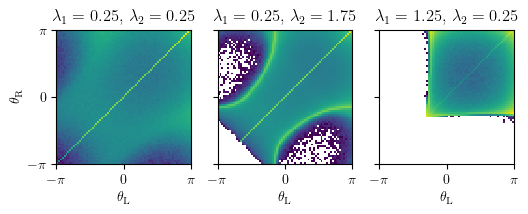

In [4]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])


ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    axs[i].pcolormesh(edges_l, edges_r, hist_full[i],
                      norm='log')

    # centers_l = (edges_l[:-1] + edges_l[1:]) / 2
    # centers_r = (edges_r[:-1] + edges_r[1:]) / 2
    # axs[i].pcolormesh(centers_l, centers_r, hist_gutz[i],
    #                   norm='log',
    #                   shading='gouraud')
    
    # axs[i].hist2d(walk_positions[i][:, 0], walk_positions[i][:, 1],
    #               density=True,
    #               range=binning_range,
    #               bins=bins,
    #               norm="log")
    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# plt.savefig("dimer-full-p-infty-mc.pdf")